<a href="https://colab.research.google.com/github/pdm03/pdm03/blob/main/py-tensorflow/DL2-CNN/dl2_01_mnist_CNN_start.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CNN model of mnist dataset**
- Conv2D + FCN
    * Conv2D : 2차원 합성곱 필터링 + 풀링(Pooling)
    - > 2차원 필터로 영상을 대표하는 특징을 추출
    * FCN : 1차원 완전연결신경망
    - > Conv2D에서 추출된 대표 특징들을 이용하여 FCN으로 최종 학습 완료

***

![mnist_NN_2_layers](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdJp5Z6%2FbtqAPebnF3x%2FQCe5vVcskhmxe964bGz4iK%2Fimg.png)

(source: https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdJp5Z6%2FbtqAPebnF3x%2FQCe5vVcskhmxe964bGz4iK%2Fimg.png)

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline

print(tf.__version__)

2.7.0


## **데이터 로딩, 정규화**

In [5]:
from keras.datasets import mnist

(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()

# Reshape
X_train = X_train0.reshape(60000,28,28,1)
X_test = X_test0.reshape(10000,28,28,1)

# Normalization
X_train, X_test = X_train/255.0, X_test/255.0 # 정규화

print("X_train={0}".format(X_train.shape))
print("y_train={0}".format(y_train0.shape)) 
print("X_test={0}".format(X_test.shape))
print("y_test={0}".format(y_test0.shape))

X_train=(60000, 28, 28, 1)
y_train=(60000,)
X_test=(10000, 28, 28, 1)
y_test=(10000,)


In [6]:
# One-Hot-Encoding
# Use function to_categorical() to do One-Hot-Encoding
# tf.keras.utils.to_categorical
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)
y_train.shape,y_test.shape

((60000, 10), (10000, 10))

### Display numbers
- 10 representative numbers

(5923, 28, 28)
(6742, 28, 28)
(5958, 28, 28)
(6131, 28, 28)
(5842, 28, 28)
(5421, 28, 28)
(5918, 28, 28)
(6265, 28, 28)
(5851, 28, 28)
(5949, 28, 28)


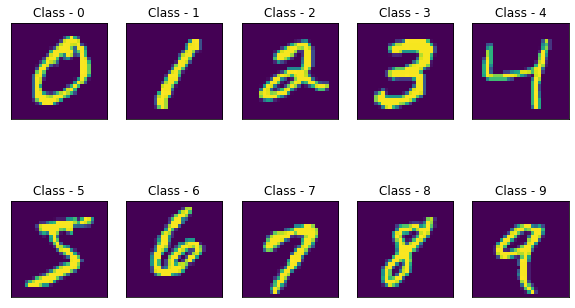

In [7]:
class_names = ["0","1","2","3","4","5","6","7","8","9"]
fig = plt.figure(figsize=(10,6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    num0_9 = X_train0[y_train0 == i]
    print(num0_9.shape)
    plt.imshow(num0_9[0]) #, cmap='gray') #, interpolation='none')
    plt.title("Class - %d" % (i))
    plt.xticks([])
    plt.yticks([])




# Design CNN

### import Conv2D, MaxPool2D

In [8]:
from keras.layers import Conv2D, MaxPool2D, Flatten

## **CNN1 + FCN2**
- CNN1: Conv2D + MaxPooling2D
- FCN2: Dense(128) + Output(8) 

In [9]:
# Random number seed
np.random.seed(1234)
tf.random.set_seed(1234)

In [16]:
c1f2 = keras.models.Sequential([ 
    Conv2D(input_shape=(28,28,1), filters= 32, 
            kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Flatten(),
    keras.layers.Dense(128, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax')
])

c1f2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [17]:
c1f2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               802944    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                      

In [12]:
3*3*32+32

320

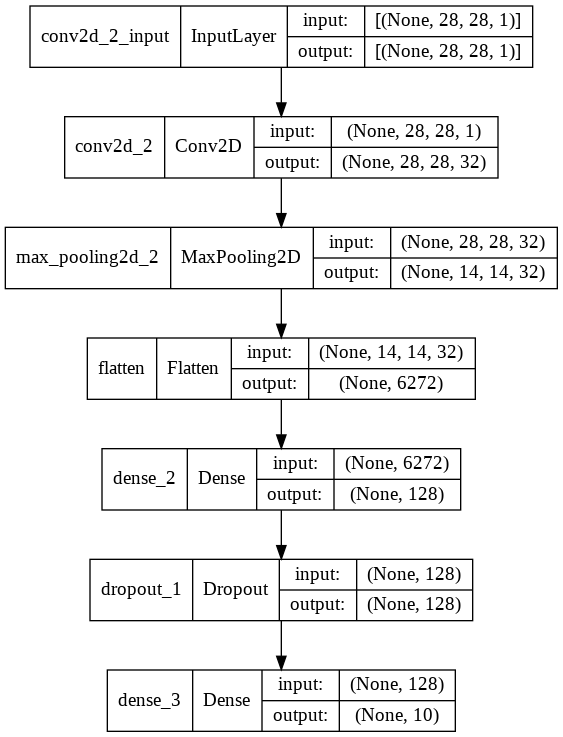

In [18]:
# Plot model
from tensorflow.keras.utils import plot_model
plot_model(c1f2, show_shapes=True, show_layer_names=True, to_file='model_c1f2.png')

In [19]:
c1f2.fit(X_train, y_train, epochs = 20,  batch_size = 100, 
            validation_data = (X_test, y_test))

Epoch 1/20
600/600 [==============================] - 35s 8ms/step - loss: 0.2245 - accuracy: 0.9351 - val_loss: 0.0733 - val_accuracy: 0.9762
Epoch 2/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0747 - accuracy: 0.9780 - val_loss: 0.0511 - val_accuracy: 0.9840
Epoch 3/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0522 - accuracy: 0.9842 - val_loss: 0.0463 - val_accuracy: 0.9841
Epoch 4/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0404 - accuracy: 0.9876 - val_loss: 0.0382 - val_accuracy: 0.9873
Epoch 5/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0314 - accuracy: 0.9898 - val_loss: 0.0371 - val_accuracy: 0.9875
Epoch 6/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0270 - accuracy: 0.9917 - val_loss: 0.0352 - val_accuracy: 0.9889
Epoch 7/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0226 - accuracy: 0.9929 - val_loss: 0.0367 - val_accuracy: 0.9880
Epoch

In [20]:
c1f2.evaluate(X_test, y_test, batch_size = 100)

100/100 [==============================] - 0s 4ms/step - loss: 0.0444 - accuracy: 0.9893


[0.04443372040987015, 0.989300012588501]

---

## **CNN1 + FCN3**

In [21]:
# Random number seed
np.random.seed(1234)
tf.random.set_seed(1234)

In [23]:
c1f3 = tf.keras.models.Sequential([ 
    Conv2D(input_shape=(28,28,1), filters= 32, 
            kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dropout(0.25), 
    tf.keras.layers.Dense(10, activation='softmax')
])

c1f3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [24]:
c1f3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 6272)              0         
                                                                 
 dense_7 (Dense)             (None, 256)               1605888   
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               32896     
                                                      

In [25]:
c1f3.fit(X_train,y_train, epochs= 20 , batch_size = 100)

Epoch 1/20
600/600 [==============================] - 5s 8ms/step - loss: 0.2500 - accuracy: 0.9245
Epoch 2/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0766 - accuracy: 0.9776
Epoch 3/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0511 - accuracy: 0.9849
Epoch 4/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0376 - accuracy: 0.9882
Epoch 5/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0294 - accuracy: 0.9907
Epoch 6/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0236 - accuracy: 0.9927
Epoch 7/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0194 - accuracy: 0.9938
Epoch 8/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0168 - accuracy: 0.9945
Epoch 9/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0156 - accuracy: 0.9950
Epoch 10/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0133 - accuracy: 0.9956

In [27]:
c1f3.evaluate(X_test, y_test, batch_size= 100)

100/100 [==============================] - 1s 4ms/step - loss: 0.0504 - accuracy: 0.9905


[0.05037127435207367, 0.9904999732971191]

## **CNN2 + FCN2**

In [53]:
# Random number seed
np.random.seed(1234)
tf.random.set_seed(1234)

In [54]:
c2f2 = tf.keras.models.Sequential([ 
    Conv2D(input_shape=(28,28,1), filters= 64, 
            kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),        
    Conv2D(filters= 32, 
            kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dropout(0.25), 
    tf.keras.layers.Dense(10, activation='softmax')
])

c2f2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [30]:
c2f2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1568)              0         
                                                                 
 dense_10 (Dense)            (None, 128)              

In [31]:
c2f2.fit(X_train, y_train, epochs = 20 , batch_size = 100)

Epoch 1/20
600/600 [==============================] - 6s 9ms/step - loss: 0.2207 - accuracy: 0.9326
Epoch 2/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0655 - accuracy: 0.9799
Epoch 3/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0462 - accuracy: 0.9858
Epoch 4/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0361 - accuracy: 0.9889
Epoch 5/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0296 - accuracy: 0.9908
Epoch 6/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0261 - accuracy: 0.9919
Epoch 7/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0224 - accuracy: 0.9928
Epoch 8/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0182 - accuracy: 0.9943
Epoch 9/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0171 - accuracy: 0.9947
Epoch 10/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0144 - accuracy: 0.9950

In [32]:
c2f2.evaluate(X_test, y_test, batch_size = 100)

100/100 [==============================] - 1s 6ms/step - loss: 0.0287 - accuracy: 0.9930


[0.028684262186288834, 0.9929999709129333]

## **CNN2 + FCN3**

In [34]:
# Random number seed
np.random.seed(1234)
tf.random.set_seed(1234)

In [35]:
c2f3 = tf.keras.models.Sequential([ 
    Conv2D(input_shape=(28,28,1), filters= 64, 
            kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),        
    Conv2D(filters= 32, 
            kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(64, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10, activation='softmax')
])

c2f3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [37]:
c2f3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 1568)              0         
                                                                 
 dense_15 (Dense)            (None, 128)              

In [38]:
c2f3.fit(X_train, y_train, epochs=20, batch_size = 100)

Epoch 1/20
600/600 [==============================] - 6s 9ms/step - loss: 0.3022 - accuracy: 0.9066
Epoch 2/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0893 - accuracy: 0.9741
Epoch 3/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0602 - accuracy: 0.9826
Epoch 4/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0506 - accuracy: 0.9855
Epoch 5/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0400 - accuracy: 0.9880
Epoch 6/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0354 - accuracy: 0.9898
Epoch 7/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0309 - accuracy: 0.9912
Epoch 8/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0262 - accuracy: 0.9918
Epoch 9/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0223 - accuracy: 0.9934
Epoch 10/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0201 - accuracy: 0.9935

In [39]:
c2f3.evaluate(X_test, y_test, batch_size = 100)

100/100 [==============================] - 1s 6ms/step - loss: 0.0317 - accuracy: 0.9925


[0.03170548006892204, 0.9925000071525574]

# **[DIY] Hidden layer에 따른 정확도**

In [40]:
c1f3.evaluate(X_test, y_test, batch_size = 100)

100/100 [==============================] - 1s 5ms/step - loss: 0.0504 - accuracy: 0.9905


[0.05037127435207367, 0.9904999732971191]

In [41]:
c1f2.evaluate(X_test, y_test, batch_size = 100)

100/100 [==============================] - 0s 4ms/step - loss: 0.0444 - accuracy: 0.9893


[0.04443372040987015, 0.989300012588501]

In [47]:
# Try another method!!
cnn_result = [[0.04443372040987015, 0.989300012588501], 
 [0.05037127435207367, 0.9904999732971191], 
 [0.028684262186288834, 0.9929999709129333], 
 [0.05037127435207367, 0.9904999732971191]]

In [48]:
# select accuracies
accuracy = [row[1] for row in cnn_result]
accuracy

[0.989300012588501, 0.9904999732971191, 0.9929999709129333, 0.9904999732971191]

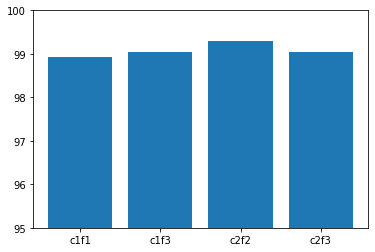

In [49]:
x = np.arange(4)
cnns = ['c1f1','c1f3','c2f2','c2f3']
accuracies = [acc*100 for acc in accuracy] # %

plt.bar(x, accuracies)
plt.xticks(x, cnns)
plt.ylim((95,100))
plt.show()

## 모형의 저장

- 트레이닝이 끝난 모형은 save 메서드로 가중치와 함께 hdf5 형식으로 저장
- load 명령으로 불러 사용

In [50]:
c2f2.save('c2f2_best.hdf5')

In [51]:
from keras.models import load_model

model = load_model('c2f2_best.hdf5')
model.evaluate(X_test, y_test, batch_size=32)

313/313 [==============================] - 2s 5ms/step - loss: 0.0287 - accuracy: 0.9930


[0.028684252873063087, 0.9929999709129333]

## C2F2 모델에 대한 loss, accuracy 그래프를 그리시오.

In [56]:
hist = c2f2.fit(X_train, y_train, 
         epochs = 20 , 
         batch_size =100, 
         validation_data=(X_test,y_test))

Epoch 1/20
600/600 [==============================] - 6s 9ms/step - loss: 0.0367 - accuracy: 0.9883 - val_loss: 0.0274 - val_accuracy: 0.9913
Epoch 2/20
600/600 [==============================] - 6s 9ms/step - loss: 0.0303 - accuracy: 0.9905 - val_loss: 0.0238 - val_accuracy: 0.9918
Epoch 3/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0251 - accuracy: 0.9922 - val_loss: 0.0253 - val_accuracy: 0.9916
Epoch 4/20
600/600 [==============================] - 6s 9ms/step - loss: 0.0220 - accuracy: 0.9927 - val_loss: 0.0219 - val_accuracy: 0.9926
Epoch 5/20
600/600 [==============================] - 6s 9ms/step - loss: 0.0188 - accuracy: 0.9936 - val_loss: 0.0289 - val_accuracy: 0.9920
Epoch 6/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0179 - accuracy: 0.9942 - val_loss: 0.0238 - val_accuracy: 0.9929
Epoch 7/20
600/600 [==============================] - 6s 9ms/step - loss: 0.0147 - accuracy: 0.9953 - val_loss: 0.0219 - val_accuracy: 0.9928
Epoc

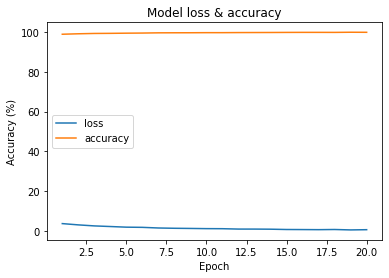

In [57]:
# Plot loass and accuracy
# Plot training & validation accuracy values
epochs = 20
loss_list = [100 * i for i in hist.history['loss']]
acc_list = [100 * i for i in hist.history['accuracy']]
plt.plot(range(1,epochs+1),loss_list) 
plt.plot(range(1,epochs+1),acc_list) 
plt.title('Model loss & accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['loss', 'accuracy'], loc='center left')

In [58]:
loss_list = [100 * i for i in hist.history['val_loss']]
acc_list = [100 * i for i in hist.history['val_accuracy']]
plt.plot(range(1,epochs+1),val_loss_list)  
plt.plot(range(1,epochs+1),acc_list)  
plt.title('Model val_loss & val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='center left')

NameError: ignored

NameError: ignored

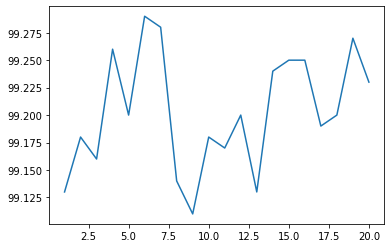

In [59]:
plt.plot(range(1,epochs+1),acc_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('accuracy vs. val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['accuracy','val_accuracy'], loc='center')

***

## [DIY] C2F3 모델에 대한 loss, accuracy 그래프를 추가하시오.

In [ ]:
# Code here!